Objectives:
1. Develop a Time series model
2. Fit time series datasets
3. Preprocess datasets
4. Visualize results
5. Smoothing time series data
6. Use the model for prediction
7. Report findings

Part 2: How does it compare to the national unemployment rate?


11. Run some smoothing techniques on the datasets and report the results.
12. Is there any need for smoothing the plots, any changes happened?
13. Predict the value of the unemployment rate for both local and national data in your birth month of year 2022.
14. Please submit the source code and .ipynp or .html file that includes the source code, answers of the questions and the resulting output of running the code.

## Explanation: I downloaded the dataset from following link: https://fred.stlouisfed.org/series/PORT941UR

## Please ensure that before downloading this dataset, you set the time range from January 2003 to January 2023, as this timeframe was used in this assignment is in this time ranges. 

### Data: Data represent the unemployment rate for the Portland area (in Oregon and Washington State) for a 20 years period.
    

### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import Local Dataset: Portlands Unemployment Rate 2003-2023

In [2]:
# Import the dataset
portland_unemp_rate = pd.read_csv('PORT941UR.csv')

### Cleaning dataset (missing values)

In [3]:
# finding missing values
missing_values = portland_unemp_rate.isnull().sum()  # Count missing values in each column
print(missing_values)

DATE         0
PORT941UR    0
dtype: int64


### Result: We dont have any missing values in this dataset

### Rename columns

In [4]:
portland_unemp_rate.columns = ['Date', 'Portlands Unemployment Rate']
portland_unemp_rate

,Date,Portlands Unemployment Rate
0,2003-01-01,7.9
1,2003-02-01,8.1
2,2003-03-01,8.2
3,2003-04-01,8.4
4,2003-05-01,8.5
...,...,...
236,2022-09-01,4.3
237,2022-10-01,4.4
238,2022-11-01,4.4
239,2022-12-01,4.3


### Converting the Date column to the datetime format
### Highest Portland's unemployment Rate 

In [5]:
# Convert 'Date' column to datetime
portland_unemp_rate['Date'] = pd.to_datetime(portland_unemp_rate['Date'])

# seperate month and year
portland_unemp_rate['Month'] = portland_unemp_rate['Date'].dt.month
portland_unemp_rate['Year'] = portland_unemp_rate['Date'].dt.year
portland_unemp_rate['Month'] = portland_unemp_rate['Month'].apply(lambda x: calendar.month_abbr[x])  # Change month number to its name

# Finding and printing the highest unemployment rate with its corresponding year and month
highest_rate_row = portland_unemp_rate.loc[portland_unemp_rate['Portlands Unemployment Rate'].idxmax()]
highest_rate = highest_rate_row['Portlands Unemployment Rate']
highest_year = highest_rate_row['Year']
highest_month = highest_rate_row['Month']
print(f"\n\n\nHighest Portland's unemployment Rate was: {highest_rate}% in {highest_month} {highest_year}\n\n\n")




Highest Portland's unemployment Rate was: 13.3% in Apr 2020





# Plot 1: Plot with label=month.

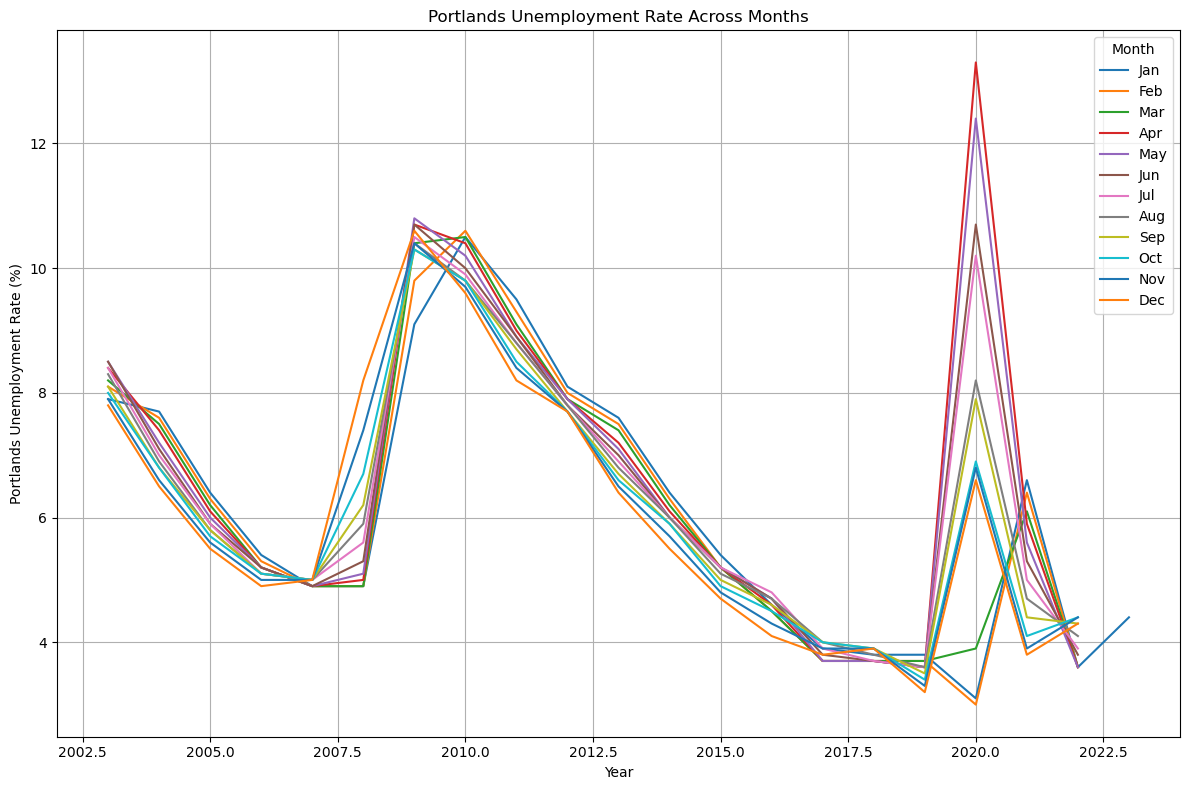

In [6]:
# Plot 1
plt.figure(figsize=(12, 8))  # Adjusted figure size for better visualization
months_order = calendar.month_abbr[1:]  # List of abbreviated month names in order

# Using a for loop
for month in months_order: 
    month_data = portland_unemp_rate[portland_unemp_rate['Month'] == month]
    sns.lineplot(x='Year', y='Portlands Unemployment Rate', data=month_data, label=month)

# Formatting the plot
plt.title('Portlands Unemployment Rate Across Months')
plt.xlabel('Year')
plt.ylabel('Portlands Unemployment Rate (%)')
plt.legend(title='Month')
plt.grid(True)
plt.tight_layout()
# Show plot
plt.show()

# Result of plot 1 : 
## <span style="color:orange;">How has Portland's unemployment rate changed over the last twenty years.</span>
### The Portlands unemployment rate illustrates a fluctuating pattern over time. From 2003 to 2006, it steadily declined. However, between 2006 and 2010, there was a noticeable increase. A decreasing trend in unemployment rate emerged from 2010 to 2019, just before the onset of the Covid-19 pandemic. Unfortunately, during of Covid-19 pandamic, the Portlands unemployment rate surged in 2020. But this rete gradually declined as we progressed towards 2023.

# Plot 2: Plot with label=year.

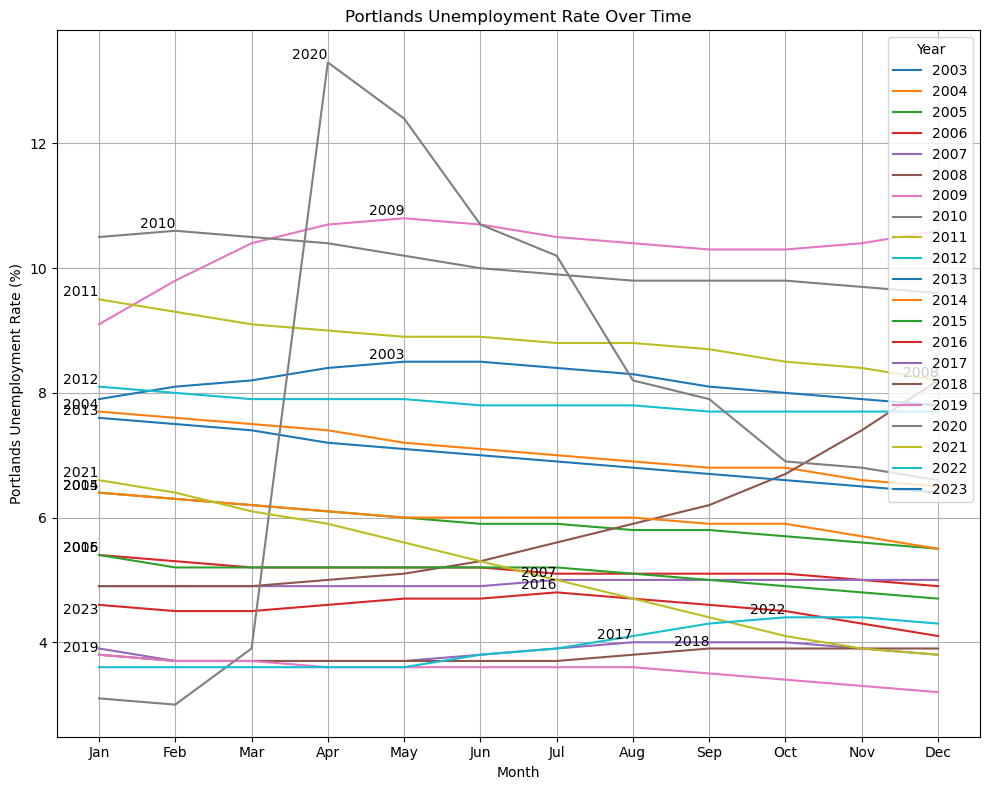

In [7]:
# Plot 2
plt.figure(figsize=(10, 8))
years = portland_unemp_rate['Year'].unique()  # Based on years

# Using a for loop
for year in years: 
    year_data = portland_unemp_rate[portland_unemp_rate['Year'] == year]
    sns.lineplot(x='Month', y='Portlands Unemployment Rate', data=year_data, label=year)

# Indicating each line with their years
for year in years:
    year_data = portland_unemp_rate[portland_unemp_rate['Year'] == year]
    max_value = year_data['Portlands Unemployment Rate'].max()
    max_month = year_data.loc[year_data['Portlands Unemployment Rate'].idxmax()]['Month']
    plt.text(max_month, max_value, str(year), ha='right', va='bottom')

# Formatting the plot
plt.title('Portlands Unemployment Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Portlands Unemployment Rate (%)')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()



# Result of plot 2: 
## <span style="color:orange;">What was the highest Portland's unemployment rate over the last twenty years?</span>
### In these two plots, the highest Portlands unemployment rate occurs in April 2020. This aligns with the time when governments worldwide began imposing quarantines due to the pandemic. Many jobs were either suspended, lost, or temporarily shut down, and many employers laid off. As a result of this crisis, the Portlands unemployment rate soared to its highest point in the past 20 years.

# Plot 3: Time series.

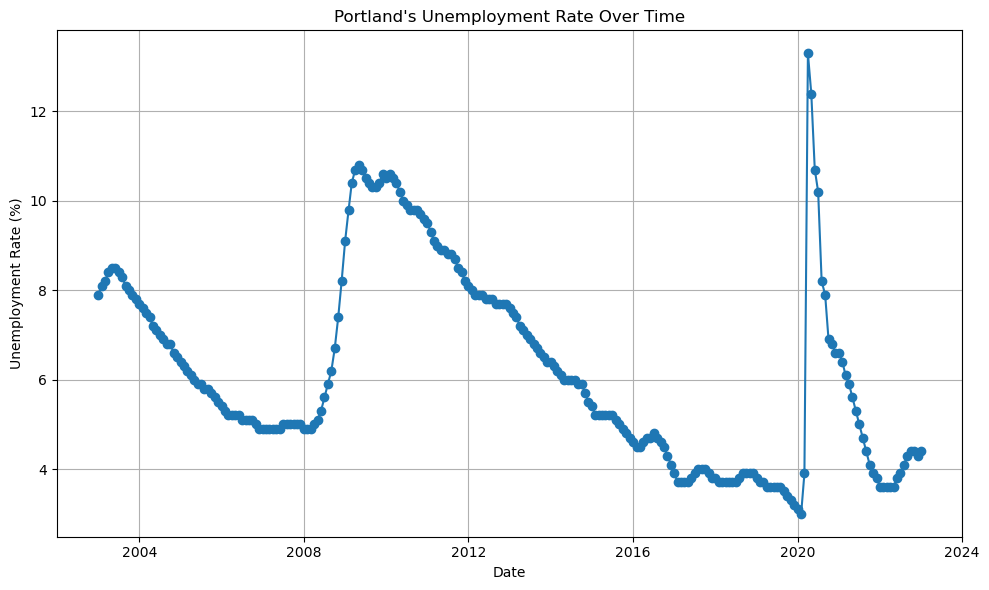

In [16]:
# Set 'Date' column as the index

portland_unemp_rate.set_index('Date', inplace=True)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(portland_unemp_rate['Portlands Unemployment Rate'], marker='o', linestyle='-')

# Formatting the plot
plt.title("Portland's Unemployment Rate Over Time")
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Result of plot 3: 
## <span style="color:orange;">How has Portland's unemployment rate changed over the last twenty years.</span>
### In the plot that shows the time series of unemployment rate in Portland, it illustrates a fluctuating pattern over time. From 2003 to 2006, it steadily declined. However, between 2006 and 2010, there was a noticeable increase. A decreasing trend of unemployment rate emerged from 2010 to 2019, just before the onset of the Covid-19 pandemic. Unfortunately, during of Covid-19 pandamic, the Portlands unemployment rate surged in 2020. but gradually declined as we progressed towards 2023.

# Unemployment rate data for the USA country.

### I obtained the dataset for the United States unemployment rate from 2003 to 2023 using this link: https://data.bls.gov/timeseries/LNS14000000.
### However, it's important to note that before downloading, you need to select the date range from 2003 to 2023, navigate to 'More Formatting Options,' choose 'Column Format,' and then click 'Retrieve Data.' This will generate an Excel file of the national dataset matching the number of months with our local dataset (Portland Unemployment Rate).

## Import National Dataset: USA Unemployment Rate 2003-2023

In [8]:
# import Excel file to a DataFrame
usa_unemp_rate = pd.read_excel('SeriesReport-20231123193017_44e241.xlsx')

usa_unemp_rate.head()

,Year,Period,Value
0,2003,M01,5.8
1,2003,M02,5.9
2,2003,M03,5.9
3,2003,M04,6.0
4,2003,M05,6.1


## Result:
### Upon importing the USA Unemployment Rate dataset, it appears that the year and month data are in distinct columns. To proceed, I need to convert them into a yyyy-mm-dd format inside of one column.

# 'Date' Column
### Create a new column named 'Date' by merging the year and period columns in the format yyyy-mm-dd.

In [9]:
# combining the year and month together to a new column
usa_unemp_rate['Date'] = pd.to_datetime(usa_unemp_rate['Year'].astype(str) + '-' + usa_unemp_rate['Period'].str[1:], format='%Y-%m')

# changing the name of columns
usa_unemp_rate.rename(columns={'Value': 'USA Unemployment Rate'}, inplace=True)

# removing the year and period columns
usa_unemp_rate.drop(['Year', 'Period'], axis=1, inplace=True)

usa_unemp_rate.head()

,USA Unemployment Rate,Date
0,5.8,2003-01-01
1,5.9,2003-02-01
2,5.9,2003-03-01
3,6.0,2003-04-01
4,6.1,2003-05-01


# Plot the national data

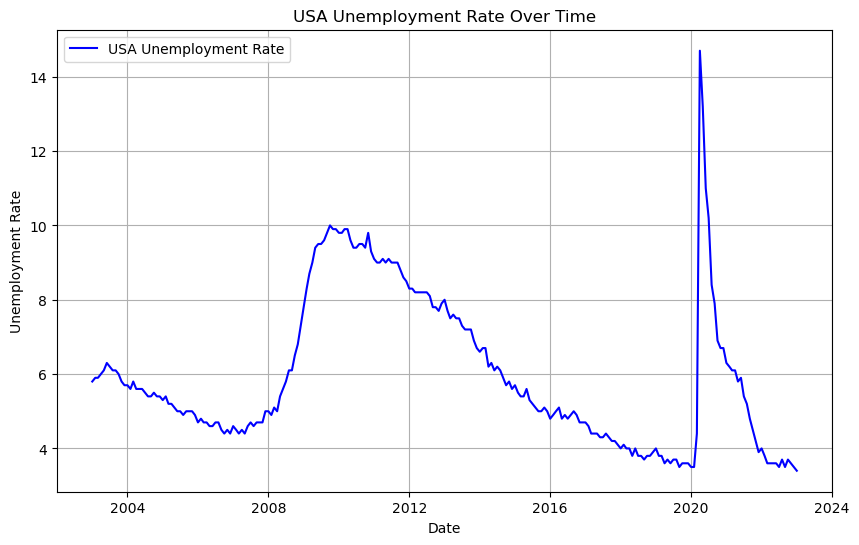

In [18]:
# Set the 'Date' column as the index for time series plotting
usa_unemp_rate.set_index('Date', inplace=True)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(usa_unemp_rate.index, usa_unemp_rate['USA Unemployment Rate'], label='USA Unemployment Rate', color='blue')
plt.title('USA Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

## Result:
### The time series plot depicting the unemployment rate in the USA, showcasing a fluctuating pattern over time. Between 2003 and 2006, there was a steady decline in the rate. However, from 2006 to 2010, a noticeable increase occurred. A decreasing trend in unemployment rate emerged from 2010 to 2019, just before the Covid-19 pandemic. during Covid-19 Pandamic, USA experienced a surge in unemployment rates in 2020, followed by a gradual decline as we moved towards 2023.

## Compare the two dataset in one plot. 

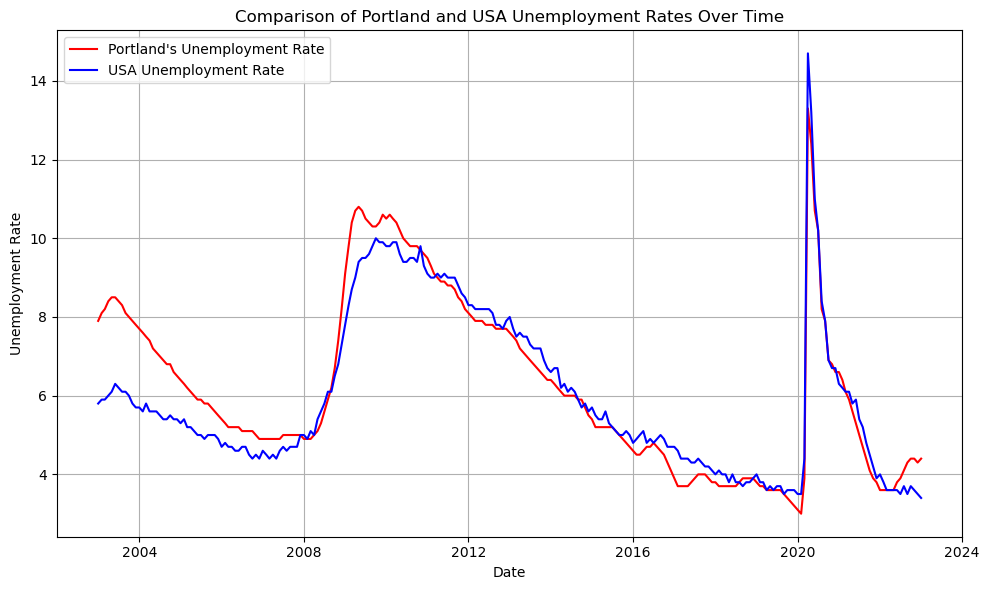

In [20]:
# comparing two dataset in one plot to show their time series
plt.figure(figsize=(10, 6))

# Portland Unemployment Rate
plt.plot(portland_unemp_rate.index, portland_unemp_rate['Portlands Unemployment Rate'], label="Portland's Unemployment Rate", color='red')

# USA Unemployment Rate
plt.plot(usa_unemp_rate.index, usa_unemp_rate['USA Unemployment Rate'], label='USA Unemployment Rate', color='blue')

# put in one plot
plt.title('Comparison of Portland and USA Unemployment Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

## Result of plot:
## <span style="color:orange;">How does it compare to the national unemployment rate?</span>
### In these time series, both 'USA Unemployment Rate' and 'Portland Unemployment Rate' exhibit a notable resemblance, displaying consistent fluctuations over time. Between 2003 and 2006, there was a consistent decline in the rate, yet Portland maintained a higher unemployment rate compared to the entire USA. From 2006 to 2010, there was a distinct increase, with Portland's unemployment rate remaining slightly above the national average. The trend shifted from 2010 to 2019, just before the Covid-19 pandemic, witnessing a decrease in both Portland and USA unemployment rates, where Portland's rate showed a slight improvement compared to the national average. Post-2019, both Portland and the USA experienced a surge in unemployment rates in 2020 due to the Covid-19 pandemic, followed by a gradual improvement leading into 2023. Also we can see the highest unemployment rate in both Portland and USA is in April 2020.

# Smoothing Techniques

# 1. Smoothed Plot (Moving Average)

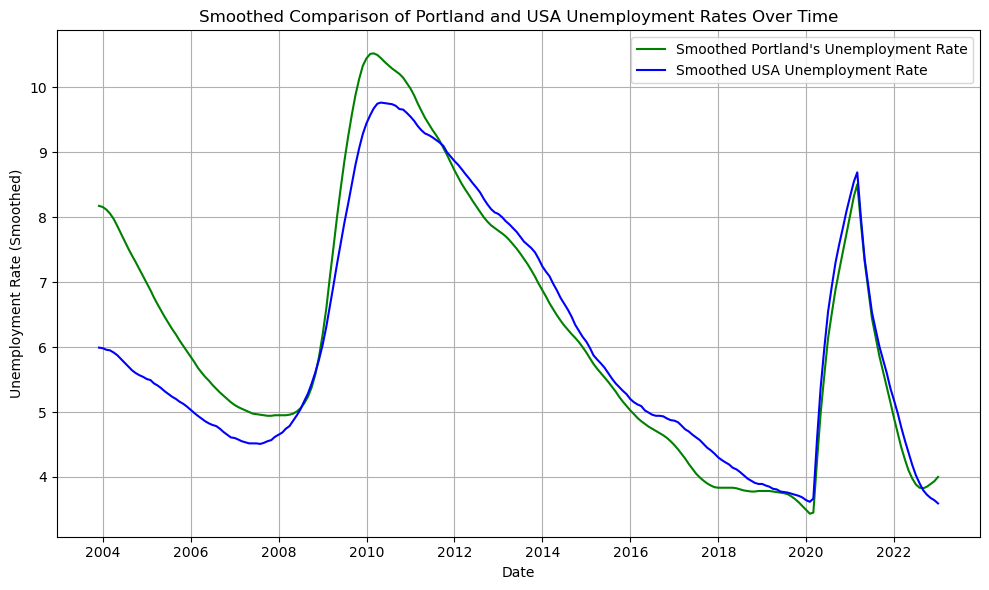

In [32]:
window_size = 12 # size of smoothing, higher means more smoothing

# Smooth portland_unemp_rate
portland_unemp_rate['Smoothed Portland Rate'] = portland_unemp_rate['Portlands Unemployment Rate'].rolling(window=window_size).mean()

# Smooth usa_unemp_rate
usa_unemp_rate['Smoothed USA Rate'] = usa_unemp_rate['USA Unemployment Rate'].rolling(window=window_size).mean()

# Plot the smooth time series
plt.figure(figsize=(10, 6))

# Plot portland_unemp_rate
plt.plot(portland_unemp_rate.index, portland_unemp_rate['Smoothed Portland Rate'], label="Smoothed Portland's Unemployment Rate", color='green')

# plot usa_unemp_rate
plt.plot(usa_unemp_rate.index, usa_unemp_rate['Smoothed USA Rate'], label='Smoothed USA Unemployment Rate', color='blue')

# Format plot
plt.title('Smoothed Comparison of Portland and USA Unemployment Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (Smoothed)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## Result of Smoothed Plot (Moving Average):
###  As you can see, the two time series are smoother than before. However, why did we see a higher unemployment rate during 2009 to 2011 compared to 2020-2021 in this smoothed plot? The reason lies in the differences in trends between these two periods—the characteristics of unemployment trends during the COVID-19 pandemic in April 2020 and the recession in 2009 are totally different. A rapid, sharp increase followed by a quick decline in April 2020 will be smoothed differently than a slower, more prolonged increase and decrease in 2009-2011. This discrepancy is why, while smoothing aids in visualizing trends, for precise analysis or identifying extreme values, referring back to the original unsmoothed data becomes necessary. What can we do to address this?

# 2. Smoothed Plot (Exponential Smoothing)

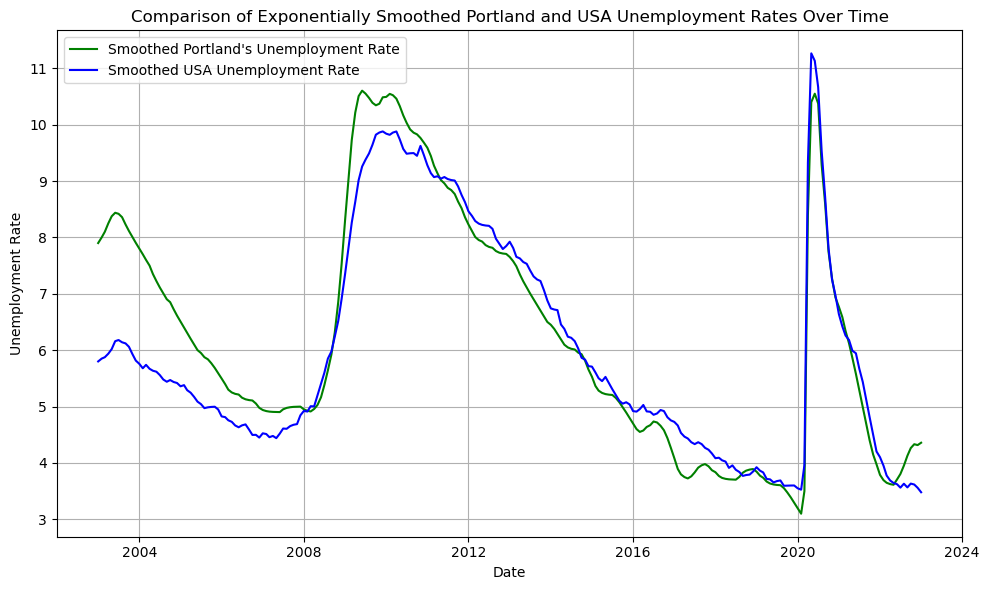

In [40]:
# Applying Exponential Smoothing to Portland Unemployment Rate
alpha_portland = 0.5  # Adjust alpha based on the desired level of smoothing
portland_unemp_rate['Exponential_Smoothed_Portland'] = portland_unemp_rate['Portlands Unemployment Rate'].ewm(alpha=alpha_portland, adjust=False).mean()

# Applying Exponential Smoothing to USA Unemployment Rate
alpha_usa = 0.5  # Adjust alpha based on the desired level of smoothing
usa_unemp_rate['Exponential_Smoothed_USA'] = usa_unemp_rate['USA Unemployment Rate'].ewm(alpha=alpha_usa, adjust=False).mean()

# Plotting smoothed Portland and USA Unemployment Rates
plt.figure(figsize=(10, 6))

# Smoothed Portland Unemployment Rate
plt.plot(portland_unemp_rate.index, portland_unemp_rate['Exponential_Smoothed_Portland'], label="Smoothed Portland's Unemployment Rate", color='green')

# Smoothed USA Unemployment Rate
plt.plot(usa_unemp_rate.index, usa_unemp_rate['Exponential_Smoothed_USA'], label='Smoothed USA Unemployment Rate', color='blue')

# Formatting the plot
plt.title('Comparison of Exponentially Smoothed Portland and USA Unemployment Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
